# SEN163A - Fundamentals of Data Analytics
# Assignment 1 - Data consistency
### Ir. Jacopo De Stefani - [J.deStefani@tudelft.nl](mailto:J.deStefani@tudelft.nl)
### Joao Pizani Flor, M.Sc. - [J.p.pizaniflor@tudelft.nl](mailto:J.p.pizaniflor@tudelft.nl)

## Group 14
- Antonio Sanchez Martin - ''5245834''
- Felix Unger - ''5673631''
- Jeroen van Paassen - ''4720970''
- Yunus Emre Torlak - '' 5597668''

# ToDo List

* [x]What's the meaning of a timestamp? Does it correspond to a fixed period of time? How can you try to find that out?
* [X]Code deliverable in the right format and runs fine
* [X]Code quality pretty good. One small remark is that there are some "empty" code cells in the dataset description. What am I supposed to do here? COPY and paste code into the cells? I don't know what to do...
* [x]Satisfactory dataset description, could be improved with a bit more contextualization and visualization
* [X]Found the big amount of 1 cent transactions all going to the same account

* [?]Some findings missing related to inconsistencies in money amounts. Both WITHIN a single transaction as well as ACCROSS transactions
* [?]Reiterates the problem description but does not provide aditional context to the problem space. Like, tying it to what you learned from the lectures.

* [ ]Does not identify clearly possible limitations to the analysis presented give action recommendations for further steps based on those findings
* [ ]Report structure has problems, like for example no conclusions / summary of findings, also it would be better if you had a dedicated section for problem description
* [ ]Some grammatical problems and typos in the report's text, it will benefit from an extra proof-reading.


# Introduction 

Fraud detection is a set of procedures designed to prevent money or property from being obtained under false pretenses. Fraud detection is used in a variety of business areas, including banking and insurance. Forging checks or using stolen credit cards are examples of bank fraud. Exaggerating losses or faking an accident for the sole purpose of obtaining compensation are examples of other types of fraud. 
In this task, we provided a sample data set. As a first step, we converted the CSV file containing the transactions into a data frame and imported Matplotlib to be able to create charts. 
asfiaskfalsknfl

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('transactions.csv')

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12, 12]
matplotlib.rcParams['figure.dpi'] = 75

# Dataset Description
The dataset was retrieved from Groote Nationale Investeer Bank. The dataset comes from the bank's database and contains the money transaction data. There are 7734833 transactions. For each transaction, there are 9 different variables within the dataset.  The explanation for the variables is as follows:
- *timestamp*: Each transaction has its own timestamp. Timestamps are starting from 1 to 743 (natural numbers)
- *type*: All transactions are the same type which is "TRANSFER"
- *amount*: The amount of money that has been sent within the transaction from one account to another. 
- *nameOrigin*: The customer code for the sender account.
- *oldbalanceOrigin*: The sender's account balance before the transaction. The number in "amount" variable is removed from this variable.
- *newbalanceOrigin*: The sender's account balance after the transaction.
- *nameDest*: The customer code for the receiver's account. 
- *oldbalanceDest*: The receiver's account balance before the transaction. The number in "amount" variable is added to this variable.
- *newbalanceDest*: The receiver's account balance after the transaction.

The stucture of this dataset can be viewed with this sample of 10 transactions beneath. 

In [2]:
# Supporting Visualization for Dataset Description. Run this after all of the computation is done.
try:
    extended_df.head(10)
except:
    pass

We used a histogram to visualize the total number of transactions. The x-axis is the amount of the transaction, the y-axis is the number of transactions. Both axes are logarithmic. 

The histogram shows that the average size of the transactions is relatively small (<= 6 euros) and that most transactions have a comparable size. It also shows that there are significant outliers in the data set, i.e., a small number of accounts that are involved in transactions much more frequently than the average. This is true for sender accounts, but even more pronounced for receiver accounts.

Text(0, 0.5, 'Number of transactions')

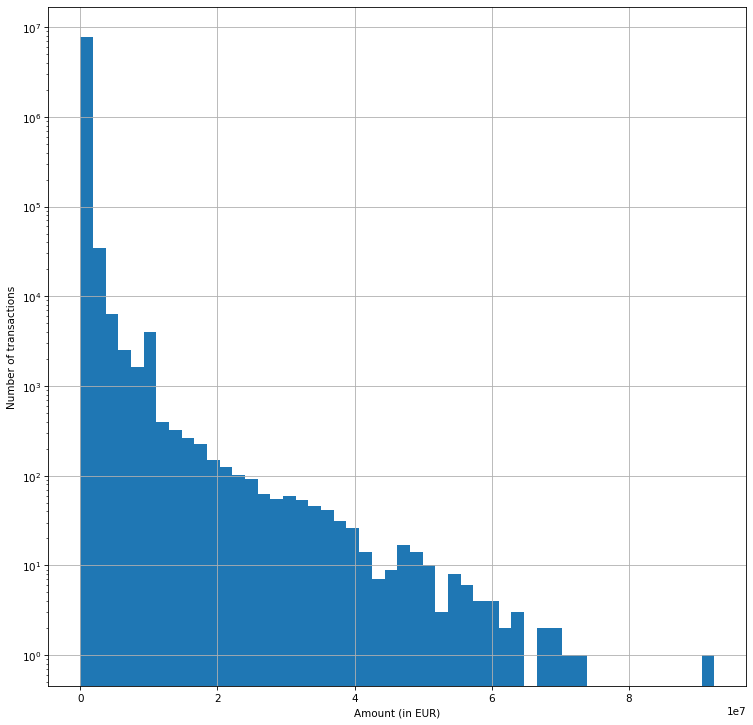

In [3]:
# Histogram plot with 50 equally distributed bins sorted by transaction amount
amounts = df['amount'].to_numpy()
plt.figure()

plt.hist(amounts, bins=50, log = 'True')
plt.grid(which='major')
plt.xlabel("Amount (in EUR)")
plt.ylabel("Number of transactions")


The boxplot chart was used to examine the composition of transaction amounts for the 20 most frequent transaction target accounts. The x-axis shows the 20 target account numbers with the most transactions, and the y-axis defines the transaction amount. 

All graphs appear to be regular except for one target account. For 19 of the 20 accounts, the median values range from 0.15 to 0.3 per transaction. 0.25 quantiles range from 0.1 to 0.15. 0.75 quantiles range from 0.25 to 0.6. Standard errors range from 0 to 1.2. 
The outlier in this case is account number C52983754, which has an average transaction amount of 0.01. The boxplot shows that 0.01 was the amount for each transaction, so the quantiles, medians, and standard errors for this account are identical. 


In [4]:
# Making lists for the origin and destination accounts
counted_origin = df['nameOrig'].value_counts()
counted_dest = df['nameDest'].value_counts()

<AxesSubplot:title={'center':'amount'}, xlabel='nameDest'>

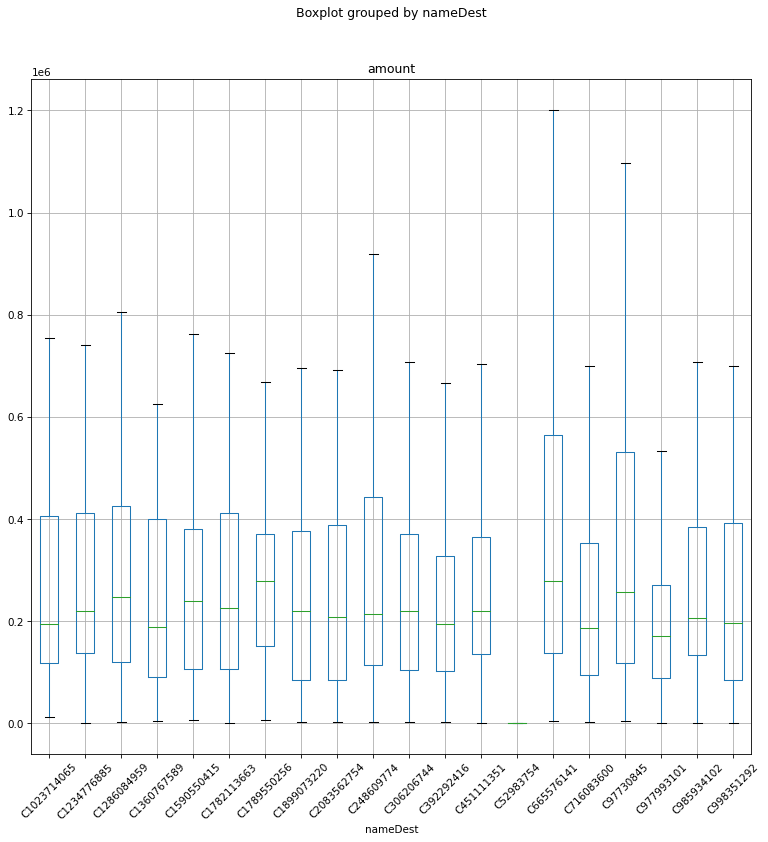

In [5]:
# Make the box plots for the first N accounts with the most transfers
accounts = list(counted_dest.to_dict().keys())[0:20]
reduced_df = df[df['nameDest'].isin(accounts)]

reduced_df.boxplot(column='amount', by='nameDest', showfliers=False, rot=45)

The scatter plot shows the value of all transactions across all timestamps. It is interesting to note that it is only after timestamp 400 that the chart is more evenly distributed across the transaction values, as we would expect. Before timestamp 400, the graph appears to be heavily distributed near the maximum amounts. Thus, in the first 400 timestamps, there are many transactions with large amounts, and many of these transactions have approximately the same monetary amounts. The average of the amounts transferred during the first 400 timestamps is significantly higher than after these timestamps.

Text(0.5, 0, 'Timestamp')

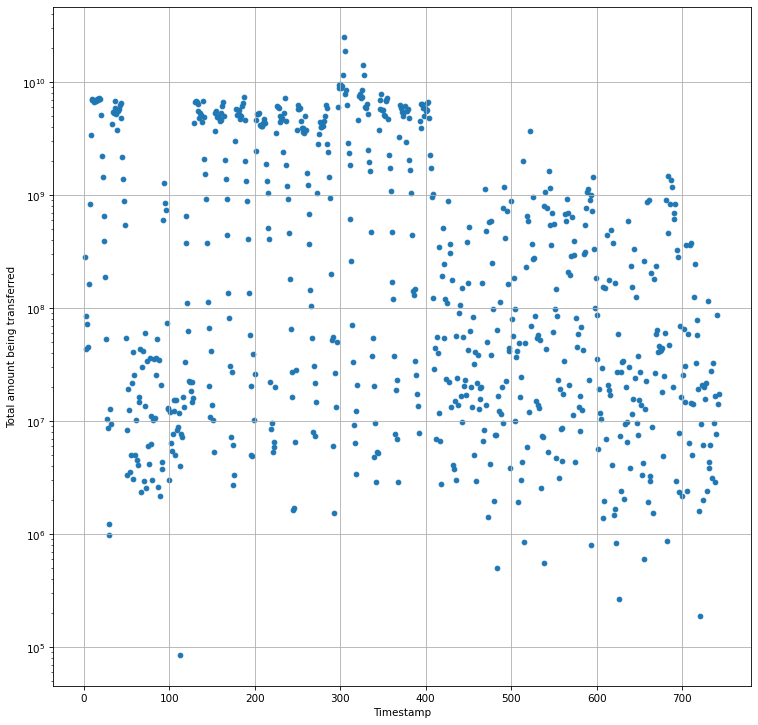

In [6]:
# Plotting the Scatterplot with all transactions over all timestamps
fig, ax = plt.subplots()
temp = df.groupby('timestamp').sum().reset_index().plot.scatter(x='timestamp', y='amount', ax=ax)
ax.grid('both')
ax.set_yscale('log')
ax.set_ylabel("Total amount being transferred")
ax.set_xlabel("Timestamp")

# Problem Description



# Dataset Consistency and Fraud Indentification

There are several observations regarding the consistency of the dataset. In the following we will investigate on the consistency and check the possibility of frauds in conspicious incosistency cases. 
Generally the maximum amount that can legally be transferred from one account to another in the Netherlands is 10.000,- euros. When the dataset is filtered, 65.63% of transfers occurred with more then 10 000 euros. Also these accounts are visualized in a table. These transactions must be reported to the tax authorities.

The maximum amount that can legally be transferred from one account to another in the Netherlands is 10.000,- euros. When the dataset is filtered, 65.63% of transfers occurred with more then 10 000 euros. Also these accounts are visualized in a table. These transactions must be reported to the tax authorities.

When the boxplot is analyzed it became clear that one account receives over 13.000 transactions (by far the most), all including 0,01 euro. This account's ID is C52983754. This could be fraudulent activity since it is suspicious that this account only receives transactions and not once sends a transaction elsewhere. This could also be explained by it being a confirmation payments to companies to verify that one account is legit. However, it is still suspicious because the account holders will not pay attention to a 0,01 change in their account balance. There is an example* for 1 cent fraud. The account's(C52983754) final balance is 13721.95 euros, which is a significant amount of money.

During the first 400 timestamps, a large amount of big transactions are being made. The scatterplot shows this very well and this could indicate fraudulent activity in a way that in a certain timespan a lot of large transactions are being made with nearly the same amount of money.

There are 16 transactions where the amount being transferred is 0. This is not expected system behavior and could be suspicious


*S. (2020, December 22). “1-Cent Thief” Aman Shah Makes Headlines Again With New Interview. Hype Malaysia. https://hype.my/2020/206817/1-cent-thief-aman-shah-utusan/ 

### **Timestamp**
First, it does not provide us with enough information for the analysis that there are only 743 different timestamps for a total of 7.734.833 different transactions. This would mean that, on average, 10.410 transactions occurred at the same timestamp, and we do not know the length of a timestamp. Doing a quick calculation, assuming that a month has 31 days with 24 hours each day, which leads to 744 hours in one month, this could indicate that the provided dataset covers one month with 31 days with each timestamp of one hour. This would also mean, since we are having only 743 timetamps provided with the dataset, that one timestamp is missing, which brings us to the idea of removing a certain timestamp with all its activities in order to a fradulent activity. Possible could be also, that due to service operations transactions have not been possible during one timestamp episode. 

### **Accounts**
Since we only have a number for the account name, we have no other information about the type of account. So it is not possible to decide whether it is a corporate or personal account based on specific transaction patterns. 
Furthermore, it is interesting to note that most bank account numbers start with a "C" at the beginning followed by a number, but some start with "M" followed by a number. All accounts starting with a "M" start with 0.00 as old Balance and are only destinations for transfers. 

##### **How many transfers with old_balance == 0**

In [21]:
threshold = 10e3
sub_df = df[(df['oldbalanceOrig']==0) & (df['amount']>threshold)]
print(f"Transactions with old balance 0 of at least {threshold}EUR: {len(sub_df.index)}\nPercentage of transactions above {threshold}EUR: {len(sub_df.index)/len(df.index)*100:.2f}%'")
sub_df.sort_values('amount', ascending=True).head(10)

Transactions with old balance 0 of at least 10000.0EUR: 1658308
Percentage of transactions above 10000.0EUR: 21.44%'


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,countOrig,countDest
6867567,396,TRANSFER,10000.02,C1400034211,0.0,-10000.02,C1799884497,122577.57,132577.58,2,4
2072013,160,TRANSFER,10000.06,C1370250682,0.0,-10000.06,M1280509686,0.00,10000.06,1,1
6610107,378,TRANSFER,10000.07,C92483286,0.0,-10000.08,C699728298,274852.68,284852.74,1,3
5763806,332,TRANSFER,10000.11,C750645522,0.0,-10000.11,M1468606357,0.00,10000.11,1,1
6487194,374,TRANSFER,10000.12,C1712704725,0.0,-10000.12,M914707234,0.00,10000.11,1,1
7654873,681,TRANSFER,10000.13,C1286543545,0.0,-10000.14,M1213334128,0.00,10000.12,1,1
2851766,189,TRANSFER,10000.14,C1214049496,0.0,-10000.14,M997726719,0.00,10000.14,1,1
4305143,260,TRANSFER,10000.15,C1369060147,0.0,-10000.16,M1288350515,0.00,10000.15,1,1
4885582,299,TRANSFER,10000.19,C473212218,0.0,-10000.19,M1616322378,0.00,10000.18,1,1
246122,13,TRANSFER,10000.23,C298034144,0.0,-10000.24,M508339013,0.00,10000.23,1,1


### **Transactions**
Also, it should be mentioned that we are only having transfers between different accounts, but no transactions like cash-in, cash-out or even more detailed transaction descriptions.
Positive is, that we are also having the old and new balances precise as float number additionally to the transfer amount. We have this information for the origin and the destination of the money transfer. This allows us the evaluate whether transfer amounts are going along with old and new balances of accounts. When checking the dataset, we found inconsistencies in these amounts being transferred. The dataset has a significant amount of transactions where 0,01 euro is taken from the sending account on top of the transferred amount of money. This 0,01 euro is according to the dataset taken from the account and not received elsewhere.

##### **How many transfers are just 0?**

In [24]:
num_zeros = np.count_nonzero(df['amount'].to_numpy()==0)
num_zeros
# Find them in the table
df.sort_values(by='amount', ascending=True).head(20)

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,countOrig,countDest
7289367,425,TRANSFER,0.00,C832555372,0.0,0.00,C1462759334,76759.90,76759.90,1,2
7635818,646,TRANSFER,0.00,C2060908932,0.0,0.00,C1587892888,355276.74,355276.74,1,4
7734636,730,TRANSFER,0.00,C729003789,0.0,-0.01,C1388096959,1868150.71,1868150.70,1,13
7734790,741,TRANSFER,0.00,C312737633,0.0,0.00,C1400061387,267522.86,267522.86,1,3
7289369,425,TRANSFER,0.00,C69493310,0.0,0.00,C719711728,4068891.50,4068891.50,1,6
7734639,730,TRANSFER,0.00,C2088151490,0.0,0.00,C1156763710,0.00,-0.01,2,1
7635820,646,TRANSFER,0.00,C1997645312,0.0,0.00,C601248796,0.00,0.00,1,1
7720953,702,TRANSFER,0.00,C1461113533,0.0,0.00,C1382150537,282698.17,282698.16,2,3
7617487,617,TRANSFER,0.00,C1971175979,0.0,0.00,C1352345416,0.00,0.00,1,1
4570231,279,TRANSFER,0.00,C539112012,0.0,0.00,C1106468520,1092811.49,1092811.49,1,11


#####  **Box plot for clients and transaction**

*Why*: To analyze
 the behavior of repeated transactions from certain clients.
**Problem**: Way too many clients for this to be of any use. We have to select just a few (clients with lots of transactions?)

As already done before in Data Description, Boxplot, we have counted repeating destinations and origins for the transactions 


Index(['C1286084959', 'C1727860160', 'C1345668381', 'C773245049', 'C220401108',
       'C1276100527', 'C1832548028', 'C1760438154', 'C770528136',
       'C2006144147', 'C22975467', 'C794519457', 'C1517362891', 'C311803110',
       'C1229452834', 'C80426193', 'C52288710', 'C950642553', 'C1934858363',
       'C1695886064'],
      dtype='object')
20


C52983754      1372194
C1286084959        113
C985934102         109
C665576141         105
C2083562754        102
                ...   
M1470027725          1
M1330329251          1
M1784358659          1
M2081431099          1
C2080388513          1
Name: nameDest, Length: 2722364, dtype: int64

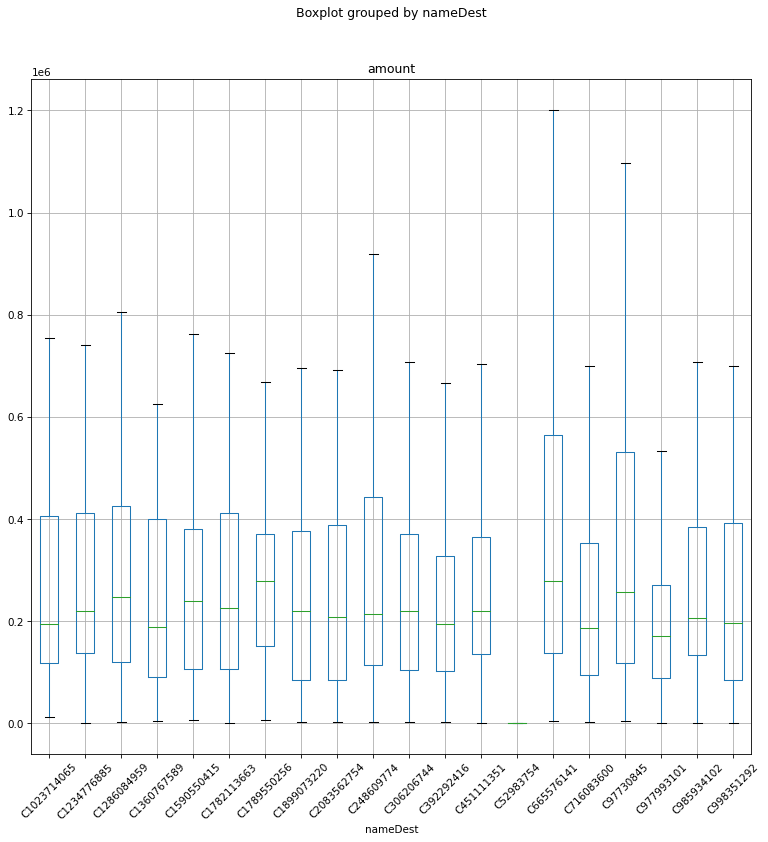

In [22]:
reduced_df.boxplot(column='amount', by='nameDest', showfliers=False, rot=45)
## Finding repeating transaction: an example of indexing the series
print(counted_origin.index[0:20])
print(counted_origin.iloc[0])
counted_dest

In [10]:
# Extending the original dataframe so that it includes the counter
extended_df= df
extended_df['countOrig'] = df.apply(lambda row: counted_origin[row['nameOrig']], axis=1)
extended_df['countDest'] = df.apply(lambda row: counted_dest[row['nameDest']], axis=1)

In [11]:
# Checking the new dataframe for the "contOrig" and ""
extended_df.head(10)

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,countOrig,countDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02,2,1372194
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.63,2,1
2,1,TRANSFER,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28,1,1
3,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00,1,44
4,1,TRANSFER,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00,1,41
5,1,TRANSFER,11668.14,C2048537720,41554.00,29885.85,M1230701703,0.00,11668.14,1,1
6,1,TRANSFER,0.01,C90045638,53860.00,53859.99,C52983754,0.02,0.03,2,1372194
7,1,TRANSFER,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,7817.70,2,1
8,1,TRANSFER,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,7107.77,1,1
9,1,TRANSFER,7861.64,C1912850431,176087.23,168225.58,M633326333,0.00,7861.64,1,1


##### **Histogram of amounts being transferred**
**Why**: To observe if there are anomalous amounts.

Text(0, 0.5, 'Number of transactions')

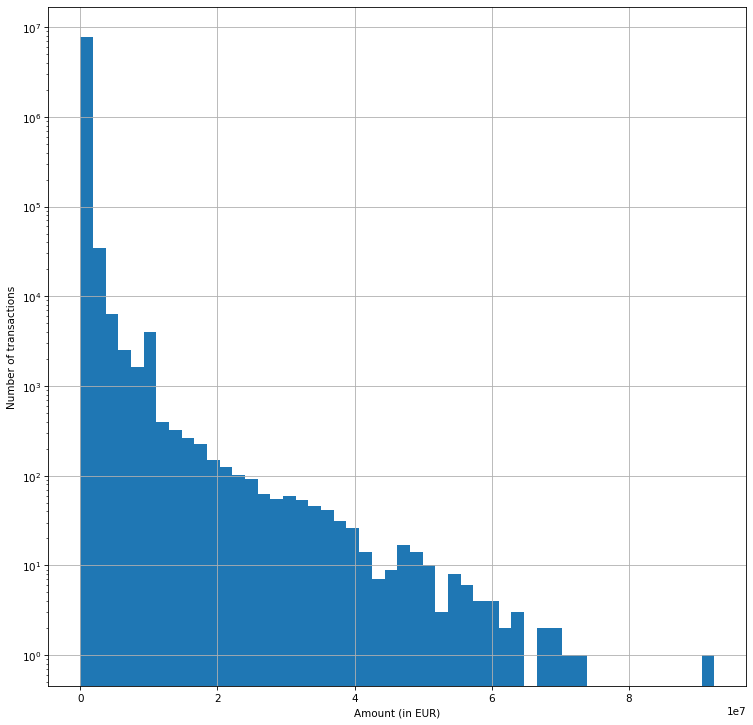

In [9]:
amounts = df['amount'].to_numpy()
plt.figure()

plt.hist(amounts, bins=50, log = 'True')
plt.grid(which='major')
plt.xlabel("Amount (in EUR)")
plt.ylabel("Number of transactions")

**Conclusion**: There are a few very large amounts being transferred, but most of them happen within the lower end of the spectrum.

During the first 400 timestamps, a large amount of big transactions are being made. The scatterplot shows this very well and this could indicate fraudulent activity in a way that in a certain timespan a lot of large transactions are being made with nearly the same amount of money.

### Pmesh plot for amounts


In [26]:
# Find all transactions between two people (bi-directional)
sub_df = df[['nameOrig', 'nameDest', 'amount']]
sub_df = sub_df.groupby(['nameOrig', 'nameDest']).sum()
sub_df = sub_df.reset_index()
# sub_df.sort_values(by='amount', ascending=False)

In [27]:
# Add up all of their amounts
sub_df = sub_df.sort_values(by='amount', ascending=True)
sub_df.head(5)

,nameOrig,nameDest,amount
384757,C10965156,C1493336195,0.0
4354118,C2088151490,C1156763710,0.0
6650226,C729003789,C1388096959,0.0
1843318,C1461113533,C1382150537,0.0
4245701,C2060908932,C1587892888,0.0


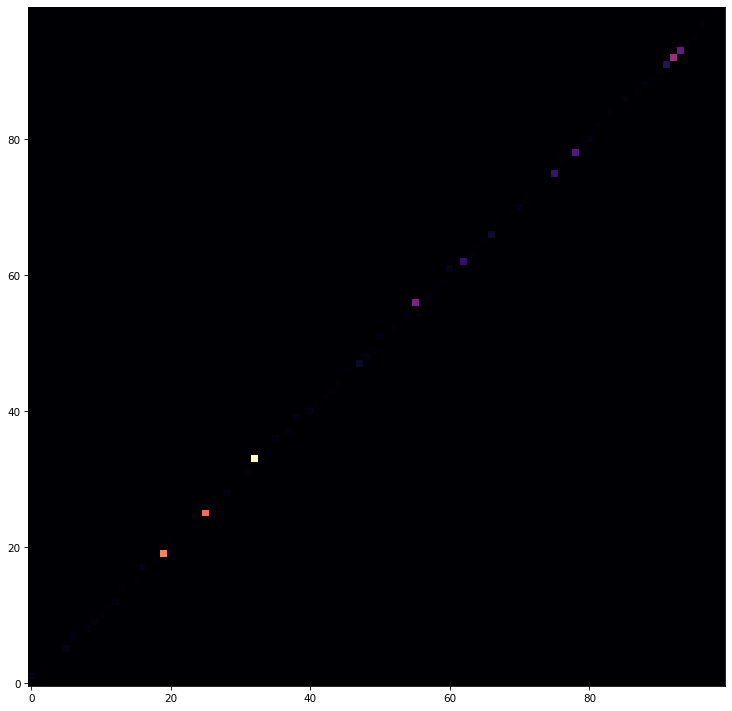

In [28]:
sub_df = df.head(100)
# make numpy array
num_origin_accounts = len(sub_df['nameOrig'])
num_dest_accounts = len(sub_df['nameDest'])
Z = np.zeros([num_dest_accounts, num_origin_accounts])

dest_accounts = sub_df['nameDest'].to_list()
origin_accounts = sub_df['nameOrig'].to_list()

for index, row in sub_df.iterrows():
    dest_index = dest_accounts.index(row['nameDest'])
    origin_index = origin_accounts.index(row['nameOrig'])
    Z[dest_index, origin_index] = row['amount']

# Time to plot
import matplotlib.pyplot as plt

x = np.array(range(num_origin_accounts))
y = np.array(range(num_dest_accounts))

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, cmap='magma')


### How many transaction amount is more then N euros

In [20]:
threshold = 10000
sub_df = df[df['amount']>threshold]
print(f'Total number of transactions: {len(df.index)}')
print(f'Number of transactions over {threshold}: {len(sub_df.index)}. \nPercentage of transactions above {threshold}: {len(sub_df.index)/len(df.index)*100:.2f}%')
sub_df.sort_values('amount', ascending=True).head(10)

Total number of transactions: 7734834
Number of transactions over 10000: 5076529. 
Percentage of transactions above 10000: 65.63%


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,countOrig,countDest
6867567,396,TRANSFER,10000.02,C1400034211,0.00,-10000.02,C1799884497,122577.57,132577.58,2,4
6109972,353,TRANSFER,10000.03,C331784776,224342.33,214342.30,M179378926,0.00,10000.02,1,1
1938981,156,TRANSFER,10000.03,C1746323712,8444.52,-1555.51,M1809554851,0.00,10000.02,2,1
6529155,376,TRANSFER,10000.05,C33969494,93200.00,83199.95,M677728274,0.00,10000.04,2,1
3523728,228,TRANSFER,10000.06,C1603154982,609913.00,599912.94,M1609693752,0.00,10000.06,1,1
2072013,160,TRANSFER,10000.06,C1370250682,0.00,-10000.06,M1280509686,0.00,10000.06,1,1
6610107,378,TRANSFER,10000.07,C92483286,0.00,-10000.08,C699728298,274852.68,284852.74,1,3
7424667,525,TRANSFER,10000.08,C428492066,2097.00,-7903.08,C114075518,0.00,10000.08,1,1
4427555,275,TRANSFER,10000.08,C805293520,422812.72,412812.64,M1845931558,0.00,10000.07,2,1
7199731,404,TRANSFER,10000.08,C560306534,18464.00,8463.92,M481454266,0.00,10000.08,1,1


### General Inconsistencies
When management provided the excerpt of transcription logs, data inconsistencies could have developed*. 
Database inconsistency can occur if you move a database, table, application or some other object by using operating system commands rather than the supported Ingres utilities
Database files can also become corrupted from hardware or software failures of various kinds.

*(Ingres. (2018). Actian. Geraadpleegd op 24 februari 2022, van https://docs.actian.com/ingres/10s/index.html#page/SysAdmin/Common_Causes_of_Inconsistent_Databases.htm)

### Do all of the old balance and new balance make sense after transfer?
The new balance with the amount transferred should add up to old amount by definition. Otherwise, money is being artificially created.

In [8]:
should_be_zero = np.round(df['newbalanceOrig'].to_numpy('float32') + df['amount'].to_numpy('float32') - df['oldbalanceOrig'].to_numpy('float32'), 2)
non_zeros = np.where(should_be_zero != 0.0)
non_zeros # This outputs the indices of all the rows that do not add up to 0.

(array([      5,       9,      22, ..., 7734805, 7734806, 7734823],
       dtype=int64),)

**Conclusion** There are some transactions that are missing 1 cent, and it is not due to inaccuracies in the float data type.

Text(0.5, 1.0, 'Origin Account')

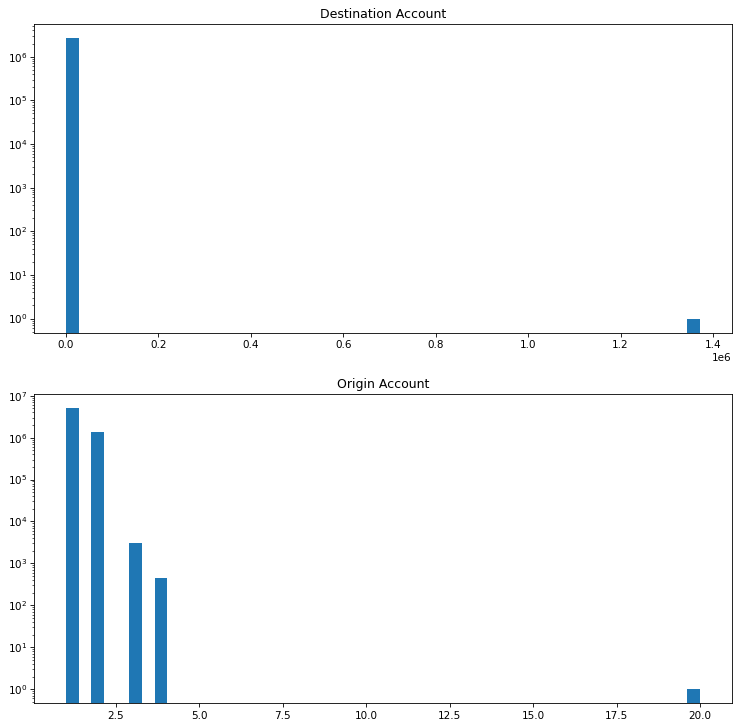

In [12]:
# Histogram of amount of transactions
# import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].hist(list(counted_dest.to_dict().values()), log=True, bins = 50)
axs[0].set_title("Destination Account")
axs[1].hist(list(counted_origin.to_dict().values()),  log=True, bins = 50)
axs[1].set_title("Origin Account")

Text(0, 0.5, 'Number of incoming transactions')

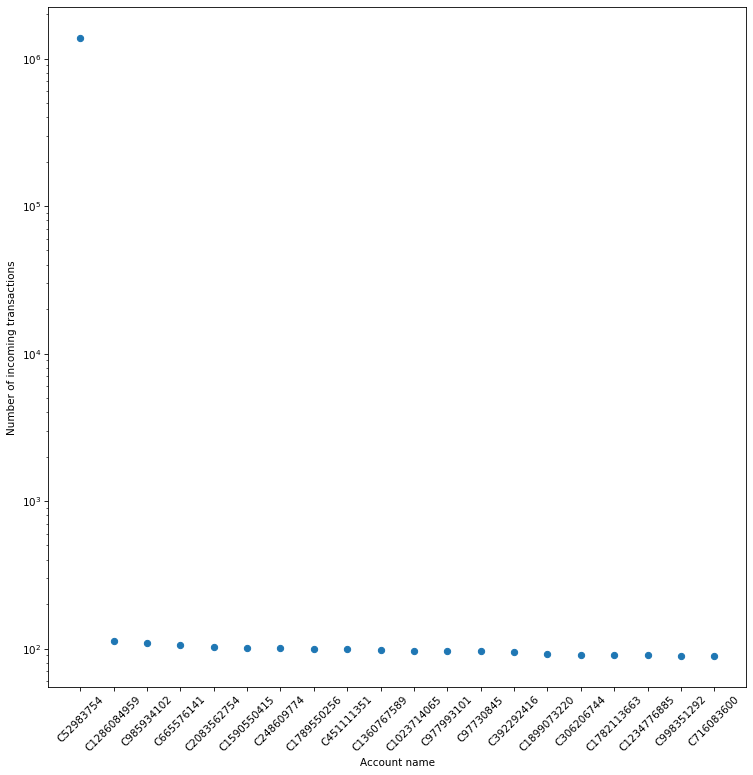

In [13]:
# Scatter plot for number of transactions of the top N dest accounts
plt.figure()
counted_dict_keys = list(counted_dest.to_dict().keys())
counted_dict_values = list(counted_dest.to_dict().values())

x = list(range(len(accounts)))
my_ticks = [counted_dict_keys[i] for i in x]
y = [counted_dict_values[i] for i in x]

plt.scatter(x, y)
plt.xticks(x, my_ticks, rotation=45)
plt.yscale('log')
plt.xlabel("Account name")
plt.ylabel("Number of incoming transactions")


In [14]:
extended_df.loc[df['nameDest'] == 'C52983754']

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,countOrig,countDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02,2,1372194
6,1,TRANSFER,0.01,C90045638,53860.00,53859.99,C52983754,0.02,0.03,2,1372194
13,1,TRANSFER,0.01,C249177573,20771.00,20770.99,C52983754,0.03,0.04,2,1372194
16,1,TRANSFER,0.01,C1716932897,10127.00,10126.99,C52983754,0.04,0.05,2,1372194
20,1,TRANSFER,0.01,C761750706,450.00,449.99,C52983754,0.05,0.06,2,1372194
...,...,...,...,...,...,...,...,...,...,...,...
7734802,741,TRANSFER,0.01,C31496887,144945.34,144945.33,C52983754,13721.90,13721.91,2,1372194
7734808,742,TRANSFER,0.01,C1970706589,4009058.39,4009058.38,C52983754,13721.91,13721.92,2,1372194
7734814,742,TRANSFER,0.01,C1674778854,54652.46,54652.45,C52983754,13721.92,13721.93,2,1372194
7734819,742,TRANSFER,0.01,C1226129332,258355.42,258355.41,C52983754,13721.93,13721.94,2,1372194


# Advice 

# Limitations of the Analysis and Further Recommendations
